In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [2]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer

In [3]:
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats

In [4]:

advanced_stats = LeagueDashTeamStats(measure_type_detailed_defense='Advanced', per_mode_detailed='PerGame', season='2020-21').get_data_frames()[0]

In [5]:
pass_stats = LeagueDashPtStats(player_or_team='Team', per_mode_simple='PerGame', season='2020-21', pt_measure_type='Passing').get_data_frames()[0]

In [6]:
merged_df = pd.merge(left=advanced_stats, right=pass_stats, on=['TEAM_ID', 'TEAM_NAME'])

In [7]:
team_imgs = {}
for i in tqdm.tqdm(range(len(merged_df))):
    item = merged_df.iloc[i]
    #team_logo = team_mappings[str(item.TEAM_ID)]
    img = Image.open(f'../../team_logos_id/{item.TEAM_ID}.png')
    team_imgs[item.TEAM_ID] = img

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 524.17it/s]


In [25]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'

In [10]:
plt.style.use('fivethirtyeight')

In [24]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    #print(path)
    return OffsetImage(plt.imread(path), zoom=0.2, zorder=5)

In [34]:
avg_def

111.24999999999999

In [35]:
avg_off

111.20000000000003

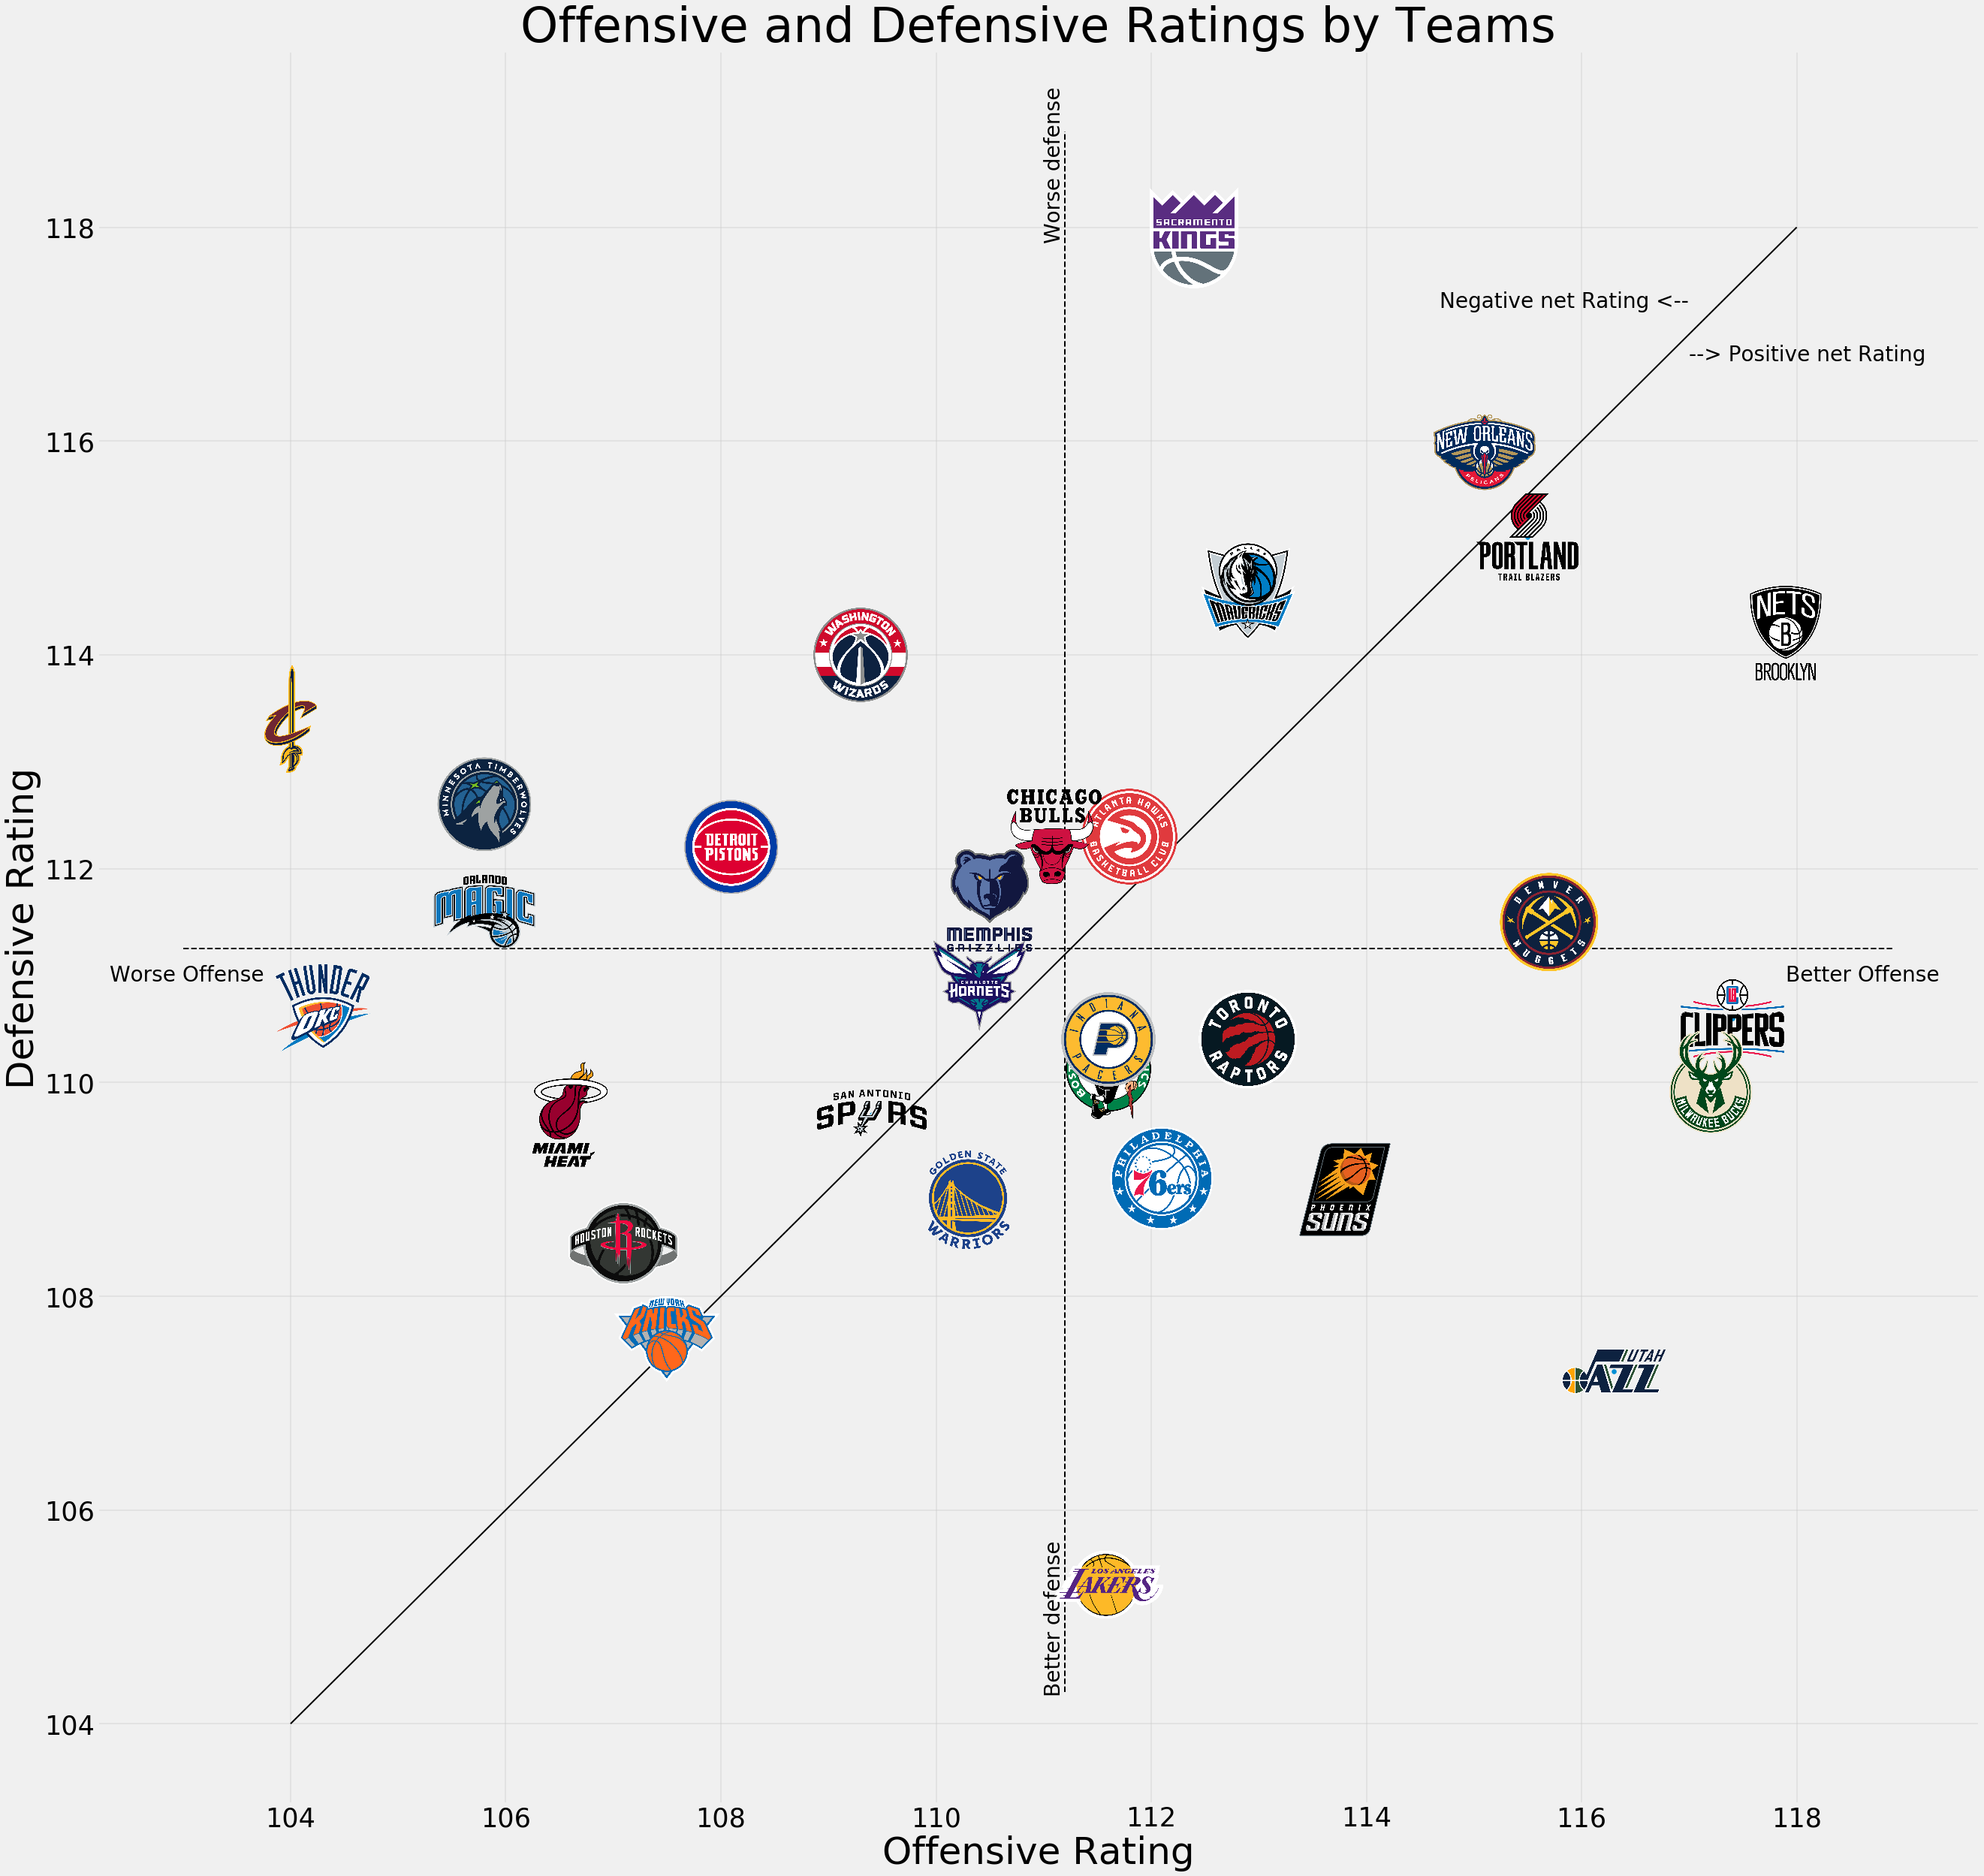

In [42]:
fig, ax = plt.subplots(figsize=(40, 40))

paths = []
for i in range(len(merged_df)):
    item = merged_df.iloc[i]
    paths.append(f'../../team_logos_id/{item.TEAM_ID}.png')
    
text_size = 28
label_size = 50
title_size = 64
    
x = merged_df.OFF_RATING.tolist()
y = merged_df.DEF_RATING.tolist()
ax.scatter(x, y) 
ax.tick_params(labelsize=35)
ax.set_xlabel("Offensive Rating", size=label_size)
ax.set_ylabel("Defensive Rating", size=label_size)
ax.set_title("Offensive and Defensive Ratings by Teams", size=title_size)
#ax.set_xlim(-0.1, 10.1)
ax.grid(b=True, alpha=0.5, lw=1.5)

avg_off = merged_df.OFF_RATING.mean()
avg_def = merged_df.DEF_RATING.mean()

off_max = merged_df.OFF_RATING.max()
off_min = merged_df.OFF_RATING.min()

def_max = merged_df.DEF_RATING.max()
def_min = merged_df.DEF_RATING.min()

ax.hlines(y=avg_def, xmin=merged_df.OFF_RATING.min()-1, xmax=merged_df.OFF_RATING.max()+1, lw=2, ls='--')
ax.vlines(x=avg_off, ymin=merged_df.DEF_RATING.min()-1, ymax=merged_df.DEF_RATING.max()+1, lw=2, ls='--')
ax.text(x=avg_def - 0.25, y=def_min-1, rotation=90, s='Better defense', size=text_size)
ax.text(x=avg_def - 0.25, y=def_max, rotation=90, s='Worse defense', size=text_size)

ax.text(y=avg_off - 0.25, x=off_min-0.25,s='Worse Offense', size=text_size, ha='right')
ax.text(y=avg_off - 0.25, x=off_max, s='Better Offense', size=text_size, ha='left')

ax.plot(
    np.arange(off_min, off_max+1, 1),
    np.arange(off_min, off_max+1, 1),
    color='black',
    lw=2
)
ax.text(x=117, y=117.25, s="Negative net Rating <--", size=text_size, ha='right')
ax.text(x=117, y=116.75, s="--> Positive net Rating", size=text_size, ha='left')

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    
    
#ax.set_facecolor(bball_gray)
#fig.set_facecolor(bball_gray)
#ax.set_frame_on(False)


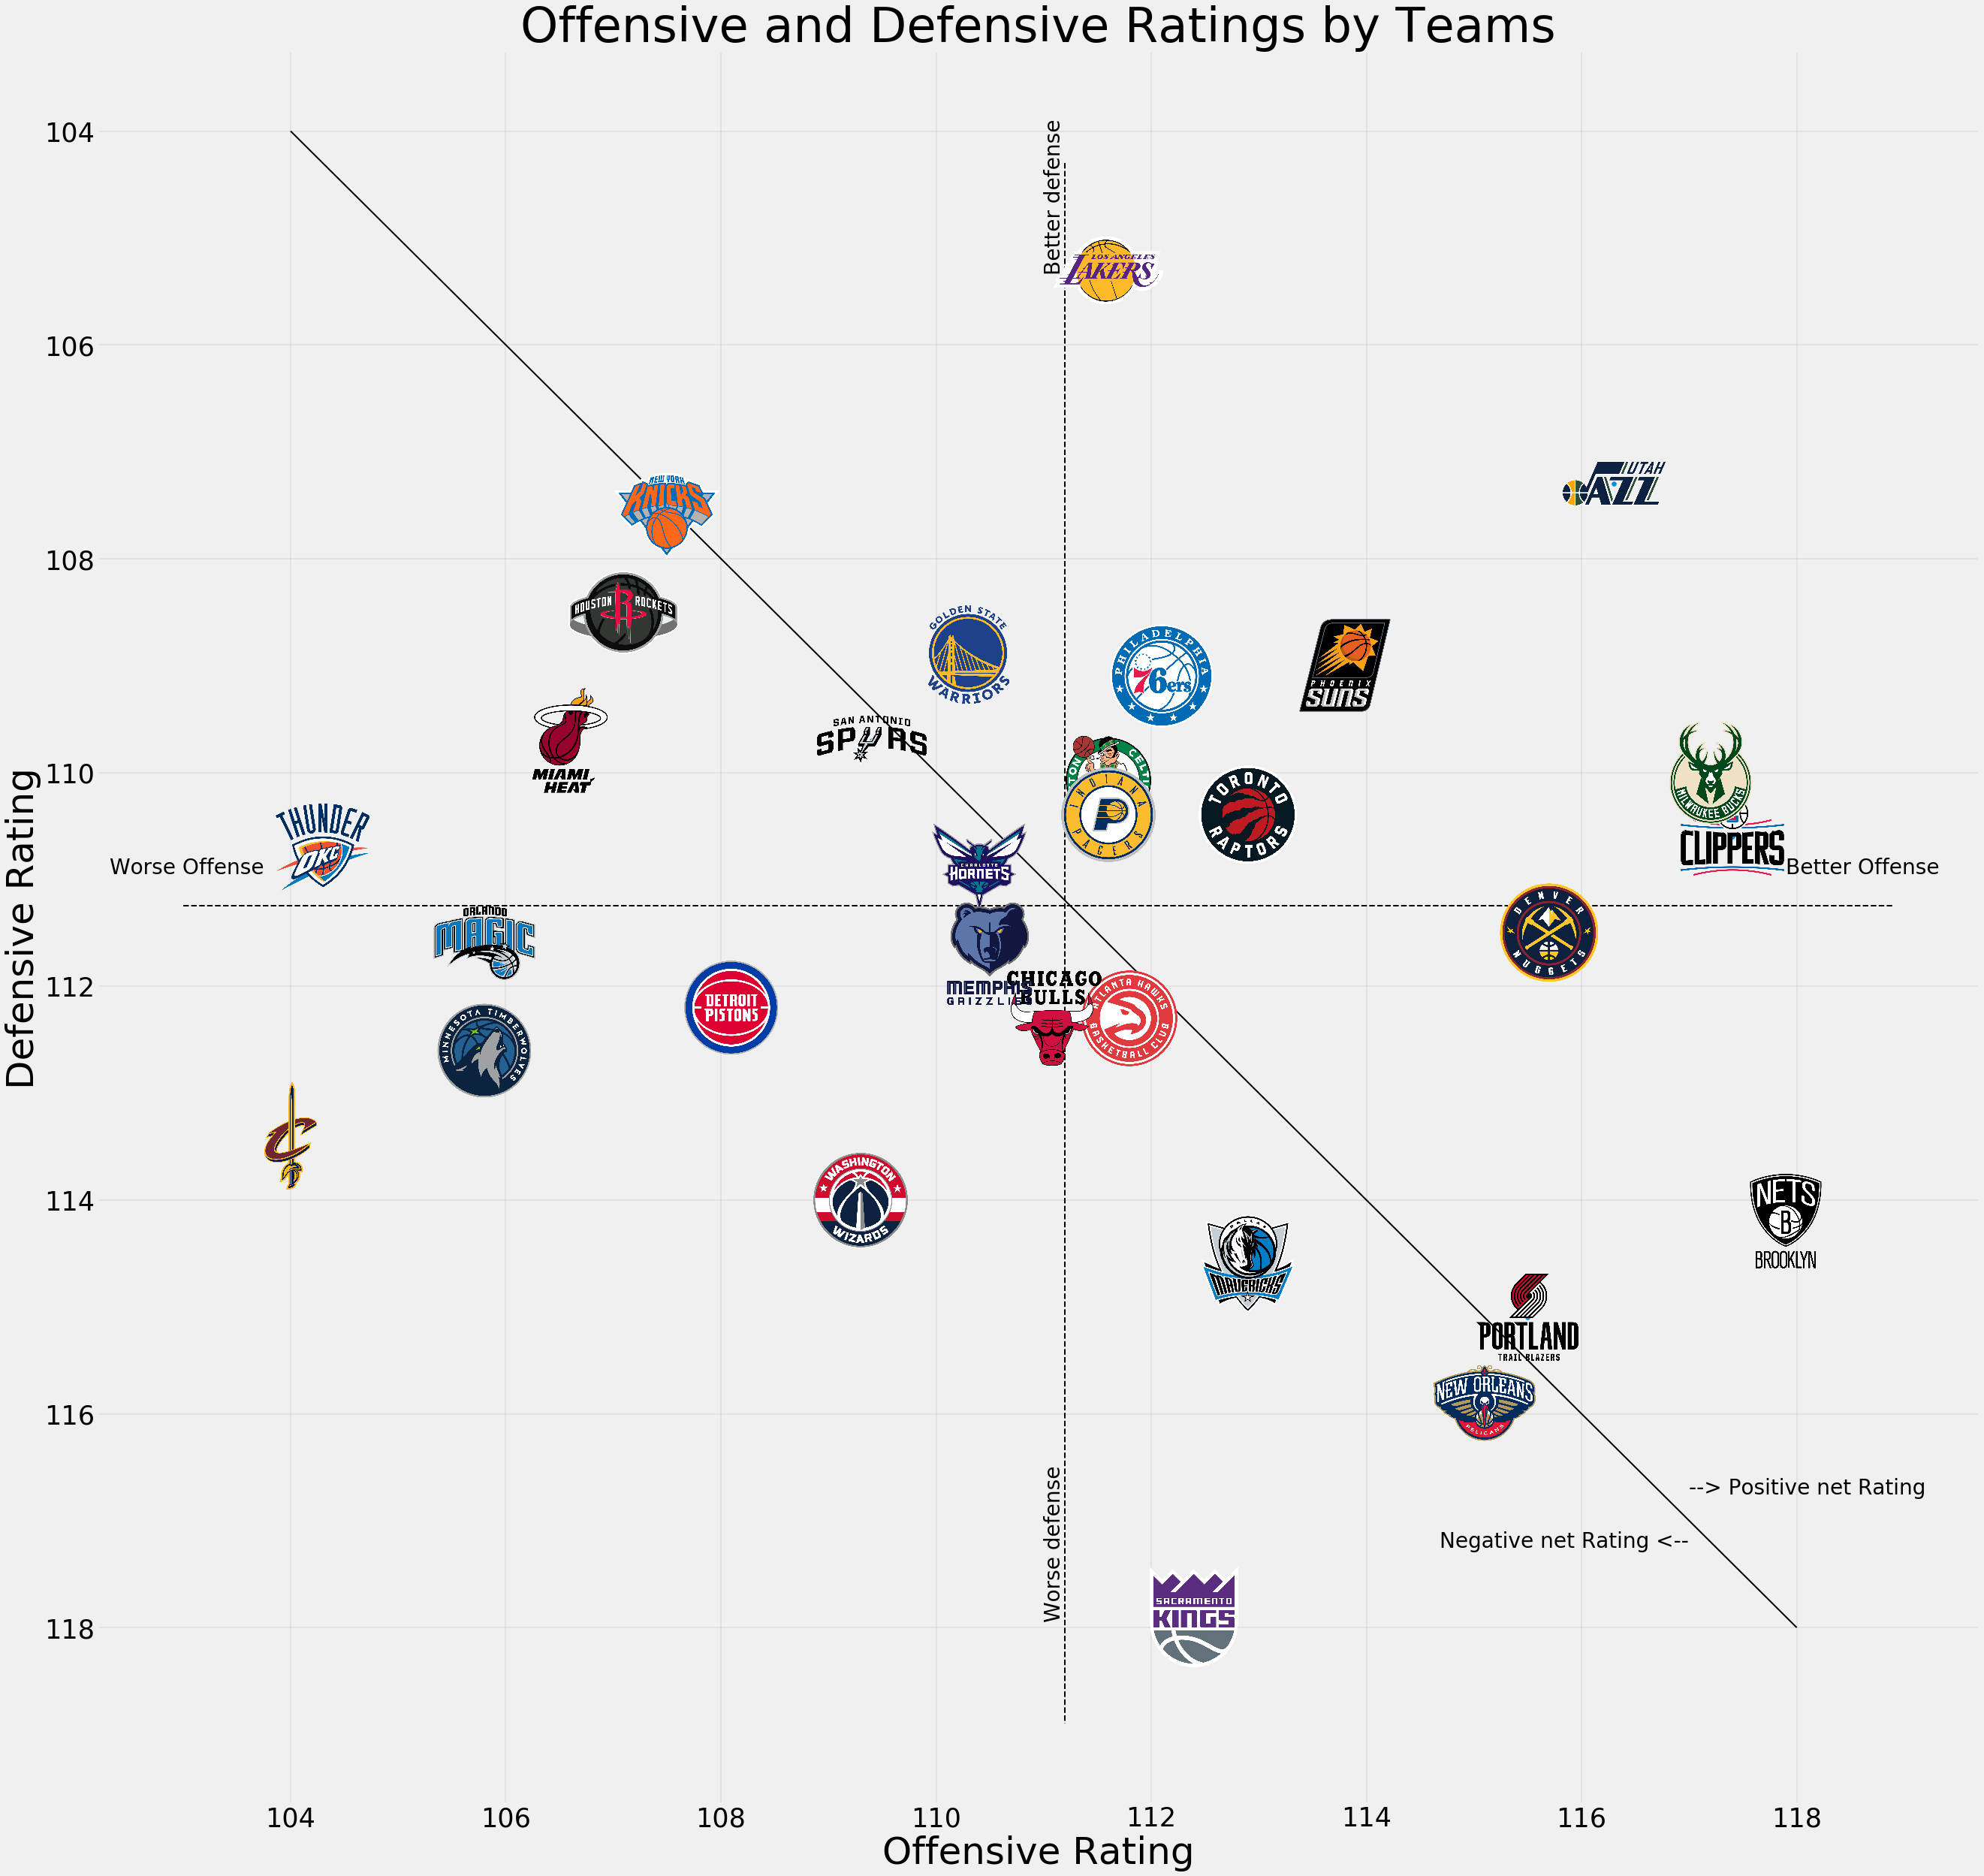

In [44]:
fig, ax = plt.subplots(figsize=(40, 40))

paths = []
for i in range(len(merged_df)):
    item = merged_df.iloc[i]
    paths.append(f'../../team_logos_id/{item.TEAM_ID}.png')
    
text_size = 28
label_size = 50
title_size = 64
    
x = merged_df.OFF_RATING.tolist()
y = merged_df.DEF_RATING.tolist()
ax.scatter(x, y) 
ax.tick_params(labelsize=35)
ax.set_xlabel("Offensive Rating", size=label_size)
ax.set_ylabel("Defensive Rating", size=label_size)
ax.set_title("Offensive and Defensive Ratings by Teams", size=title_size)
#ax.set_xlim(-0.1, 10.1)
ax.grid(b=True, alpha=0.5, lw=1.5)

avg_off = merged_df.OFF_RATING.mean()
avg_def = merged_df.DEF_RATING.mean()

off_max = merged_df.OFF_RATING.max()
off_min = merged_df.OFF_RATING.min()

def_max = merged_df.DEF_RATING.max()
def_min = merged_df.DEF_RATING.min()

ax.hlines(y=avg_def, xmin=merged_df.OFF_RATING.min()-1, xmax=merged_df.OFF_RATING.max()+1, lw=2, ls='--')
ax.vlines(x=avg_off, ymin=merged_df.DEF_RATING.min()-1, ymax=merged_df.DEF_RATING.max()+1, lw=2, ls='--')
ax.text(x=avg_def - 0.25, y=def_min, rotation=90, s='Better defense', size=text_size)
ax.text(x=avg_def - 0.25, y=def_max, rotation=90, s='Worse defense', size=text_size)

ax.text(y=avg_off - 0.25, x=off_min-0.25,s='Worse Offense', size=text_size, ha='right')
ax.text(y=avg_off - 0.25, x=off_max, s='Better Offense', size=text_size, ha='left')

ax.plot(
    np.arange(off_min, off_max+1, 1),
    np.arange(off_min, off_max+1, 1),
    color='black',
    lw=2
)
ax.text(x=117, y=117.25, s="Negative net Rating <--", size=text_size, ha='right')
ax.text(x=117, y=116.75, s="--> Positive net Rating", size=text_size, ha='left')

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    
ax.invert_yaxis()
    
#ax.set_facecolor(bball_gray)
#fig.set_facecolor(bball_gray)
#ax.set_frame_on(False)
